In [ ]:
"""
Problem 1.4
We encode our prior knowledge for the unknown parameter vector via a 
Gaussian distribution G(θ) with mean theta_zero  equal to the true parameter 
vector in equation (1) and covariance matrix  (diagonal with sigma_theta_sq = 0,1).
Use the structure of the true model and perform full Bayesian Inference in order 
to evaluate y for 20 randomly selected test set points belonging to the interval 
[0,2] and for two different values of (0.05 and 0.15). Plot your estimates and 
their errors on the (x,y) plane. 

"""

import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt
from functions_problems_1b import *

In [ ]:
"""
Parameters
"""
#True theta vector
thetas = np.array([0.2, -1, 0.9, 0.7, 0, -0.2])

#How many points
N = 20

#Uncertainty of our knowledge of θ0
sigma_theta_sq = 0.1

#Noise variance
sigma_htta_sq = [0.05, 0.15]
#Mean of the noise
mu_noise = 0

#Idenity matrix
id_matrix = np.identity(thetas.shape[0])

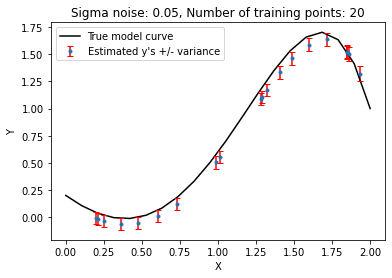

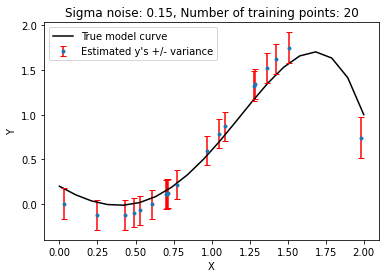

In [ ]:
for noise_var in sigma_htta_sq:
    #Create the training set
    #Get N equidistant points in the interval [0,2] for the training set
    X_train = np.linspace(0,2, N)

    #Get the Phi matrix for the training set
    phi_matrix = get_Phi(X_train, 5, N)

    #Get the y vector (y_true: without added noise, y_train: with added noise)
    y_true, y_train = get_y_vector(thetas, phi_matrix, mu_noise, noise_var, N)

    #Get the mean theta given y vector
    mu_th_y = fun_mu_th_y(noise_var, sigma_theta_sq, thetas, phi_matrix, y_train, id_matrix)

    #Create the test set
    #Get 20 random points from a uniform distribution in the interval [0,2]
    x_test = np.random.uniform(0, 2, N)

    #Get the mean y's and the variance of y's
    mu_y, sigma_y = fun_mu_sigma_y(x_test, 5, N, mu_th_y, noise_var, sigma_theta_sq, phi_matrix)

    #Create a plot of the estimates (blue dots) and their errors (red error bars) against the true model curve (green line)
    plt.title("Sigma noise: %s, Number of training points: %s" % (noise_var, N))
    plt.plot(X_train, y_true, 'k-', label="True model curve")
    plt.errorbar(x_test, mu_y, yerr=sigma_y, linestyle='None', marker='.', elinewidth=1, capsize=3, 
                 ecolor = "r", label="Estimated y's +/- variance")
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()